# Imports and Instantiation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re
from rich import print
from rich.table import Table
from rich.console import Console
import seaborn as sns

console = Console()

# Loading the Data



In [ ]:
# Defining the file paths of the train dataset
train_set = "data/laptop_data_train.csv"
test_set = 'data/laptop_data_test.csv'

# Reading the Datasets into their respective Pandas Dataframes
train_data = pd.read_csv(train_set, header=0)
test_data = pd.read_csv(test_set, header=0)

# Dropping the 'Number' Column as it is surplus to requirements
train_data = train_data.drop('Number', axis=1)
test_data = test_data.drop('Number', axis=1)

# Storing all the features in a list of attributes
attributes = train_data.columns.tolist()

# Feature Engineering

Clean data - eliminate redundant values. For numerical data, replace missing values with NaN. For categorical data, replace missing values with 'None'

## The Data

In [ ]:
print('Unique Values recorded in each feature (before processing)')

# Printing all unique values of each feature in the dataset to understand the data better
for attribute in attributes[:-1]:
    att_table = Table()
    att_table.add_column(f'{attribute}: Unique Count = {len(set(train_data[attribute]))}; Data type = {type(train_data[attribute][0])}', style='blue')

    for element in set(train_data[attribute]):
        att_table.add_row(str(element))

    console.print(att_table)

Unique Values recorded in each feature (before processing)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Company: Unique Count = 19; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ HP                                                    │
│ Chuwi                                                 │
│ Asus                                                  │
│ Lenovo                                                │
│ Samsung                                               │
│ Vero                                                  │
│ Mediacom                                              │
│ Huawei                                                │
│ Apple                                                 │
│ MSI                                                   │
│ LG                                                    │
│ Dell                                                  │
│ Fujitsu                                               │
│ Google                                                │
│ Razer                                                 │
│ Microsoft                                             │
│ Toshiba                                               │
│ Xiaomi                                                │
│ Acer                                                  │
└───────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ TypeName: Unique Count = 6; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Workstation                                           │
│ 2 in 1 Convertible                                    │
│ Ultrabook                                             │
│ Netbook                                               │
│ Notebook                                              │
│ Gaming                                                │
└───────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Inches: Unique Count = 17; Data type = <class 'numpy.float64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 14.1                                                           │
│ 10.1                                                           │
│ 11.6                                                           │
│ 12.0                                                           │
│ 13.3                                                           │
│ 14.0                                                           │
│ 15.4                                                           │
│ 15.6                                                           │
│ 17.3                                                           │
│ 13.5                                                           │
│ 12.5                                                           │
│ 13.0                                                           │
│ 18.4                                                           │
│ 13.9                                                           │
│ 17.0                                                           │
│ 15.0                                                           │
│ 12.3                                                           │
└────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ScreenResolution: Unique Count = 37; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ IPS Panel 2560x1440                                            │
│ IPS Panel 1366x768                                             │
│ Full HD / Touchscreen 1920x1080                                │
│ IPS Panel Quad HD+ / Touchscreen 3200x1800                     │
│ IPS Panel Retina Display 2880x1800                             │
│ IPS Panel Touchscreen 1920x1200                                │
│ IPS Panel Quad HD+ 3200x1800                                   │
│ Quad HD+ / Touchscreen 3200x1800                               │
│ Touchscreen 2400x1600                                          │
│ IPS Panel Full HD 1920x1200                                    │
│ Touchscreen / Quad HD+ 3200x1800                               │
│ Full HD 1920x1080                                              │
│ IPS Panel Full HD 2560x1440                                    │
│ 4K Ultra HD / Touchscreen 3840x2160                            │
│ 1920x1080                                                      │
│ IPS Panel Full HD 2160x1440                                    │
│ 2560x1440                                                      │
│ IPS Panel Touchscreen / 4K Ultra HD 3840x2160                  │
│ IPS Panel Full HD 1366x768                                     │
│ IPS Panel Touchscreen 2560x1440                                │
│ 1440x900                                                       │
│ Touchscreen 2560x1440                                          │
│ 1600x900                                                       │
│ Touchscreen / Full HD 1920x1080                                │
│ 1366x768                                                       │
│ IPS Panel Retina Display 2560x1600                             │
│ IPS Panel 4K Ultra HD / Touchscreen 3840x2160                  │
│ IPS Panel Touchscreen 1366x768                                 │
│ IPS Panel 4K Ultra HD 3840x2160                                │
│ Touchscreen 1366x768                                           │
│ Touchscreen 2256x1504                                          │
│ 4K Ultra HD 3840x2160                                          │
│ IPS Panel Retina Display 2304x1440                             │
│ IPS Panel Full HD / Touchscreen 1920x1080                      │
│ IPS Panel Retina Display 2736x1824                             │
│ IPS Panel Full HD 1920x1080                                    │
│ IPS Panel Quad HD+ 2560x1440                                   │
└────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Cpu: Unique Count = 100; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Intel Atom Z8350 1.92GHz                           │
│ Intel Core i3 6100U 2.3GHz                         │
│ Intel Core i7 8650U 1.9GHz                         │
│ AMD A10-Series A10-9620P 2.5GHz                    │
│ Intel Core i5 6440HQ 2.6GHz                        │
│ Intel Pentium Quad Core N3710 1.6GHz               │
│ Intel Core i5 7Y57 1.2GHz                          │
│ Intel Core i7 6920HQ 2.9GHz                        │
│ Intel Core i7 7600U 2.8GHz                         │
│ Intel Core i5 6300U 2.4GHz                         │
│ AMD A12-Series 9720P 2.7GHz                        │
│ Intel Core i3 6006U 2.2GHz                         │
│ Intel Core i7 7660U 2.5GHz                         │
│ Intel Core i7 2.7GHz                               │
│ Intel Core i7 7Y75 1.3GHz                          │
│ Intel Core i7 7500U 2.7GHz                         │
│ AMD A6-Series 7310 2GHz                            │
│ Intel Core i7 2.9GHz                               │
│ Intel Core i5 7440HQ 2.8GHz                        │
│ AMD A9-Series 9420 3GHz                            │
│ AMD E-Series 9000e 1.5GHz                          │
│ Intel Celeron Quad Core N3160 1.6GHz               │
│ Intel Core i3 6006U 2.0GHz                         │
│ AMD A9-Series A9-9420 3GHz                         │
│ Intel Core i7 7560U 2.4GHz                         │
│ Intel Core M M3-6Y30 0.9GHz                        │
│ Intel Core i5 6300HQ 2.3GHz                        │
│ Intel Pentium Dual Core 4405U 2.1GHz               │
│ Intel Xeon E3-1505M V6 3GHz                        │
│ AMD A10-Series 9600P 2.4GHz                        │
│ AMD A6-Series 9220 2.9GHz                          │
│ AMD A12-Series 9720P 3.6GHz                        │
│ Intel Core i5 7200U 2.5GHz                         │
│ Intel Core i7 7820HQ 2.9GHz                        │
│ Intel Core i7 2.8GHz                               │
│ Intel Core i5 1.6GHz                               │
│ Intel Core i5 7300HQ 2.5GHz                        │
│ Intel Celeron Dual Core N3350 1.1GHz               │
│ Intel Core i5 7500U 2.7GHz                         │
│ Intel Core i5 7Y54 1.2GHz                          │
│ AMD A4-Series 7210 2.2GHz                          │
│ Intel Core i5 8250U 1.6GHz                         │
│ Intel Pentium Quad Core N4200 1.1GHz               │
│ Intel Celeron Dual Core N3060 1.6GHz               │
│ AMD E-Series E2-6110 1.5GHz                        │
│ Intel Core M m3-7Y30 2.2GHz                        │
│ Intel Core i5 6260U 1.8GHz                         │
│ AMD A12-Series 9700P 2.5GHz                        │
│ Intel Core i5 3.1GHz                               │
│ AMD A10-Series 9620P 2.5GHz                        │
│ Intel Celeron Dual Core 3855U 1.6GHz               │
│ AMD E-Series E2-9000e 1.5GHz                       │
│ AMD A6-Series A6-9220 2.5GHz                       │
│ Intel Core i5 2.9GHz                               │
│ Intel Atom x5-Z8300 1.44GHz                        │
│ Intel Core i7 7700HQ 2.8GHz                        │
│ Intel Xeon E3-1535M v6 3.1GHz                      │
│ AMD Ryzen 1600 3.2GHz                              │
│ Intel Core i7 6820HK 2.7GHz                        │
│ Intel Core i3 7100U 2.4GHz                         │
│ Intel Core M 7Y30 1.0GHz                           │
│ Intel Core i5 6200U 2.3GHz                         │
│ Intel Atom x5-Z8350 1.44GHz                        │
│ AMD E-Series E2-9000 2.2GHz                        │
│ Intel Core i5 7300U 2.6GHz                         │
│ Intel Celeron Dual Core N3050 1.6GHz               │
│ AMD E-Series 7110 1.8GHz                           │
│ Intel Core i3 7130U 2.7GHz                         │
│ AMD Ryzen 1700 3GHz                                │
│ AMD A9-Series 9420 2.9GHz             

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Ram: Unique Count = 8; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 6GB                                              │
│ 16GB                                             │
│ 12GB                                             │
│ 24GB                                             │
│ 2GB                                              │
│ 8GB                                              │
│ 4GB                                              │
│ 32GB                                             │
└──────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Memory: Unique Count = 33; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 512GB SSD                                            │
│ 256GB SSD                                            │
│ 128GB HDD                                            │
│ 256GB SSD +  1TB HDD                                 │
│ 256GB Flash Storage                                  │
│ 32GB Flash Storage                                   │
│ 64GB SSD                                             │
│ 16GB SSD                                             │
│ 256GB SSD +  2TB HDD                                 │
│ 1TB SSD                                              │
│ 1TB HDD                                              │
│ 16GB Flash Storage                                   │
│ 512GB Flash Storage                                  │
│ 256GB SSD +  256GB SSD                               │
│ 512GB SSD +  2TB HDD                                 │
│ 1TB SSD +  1TB HDD                                   │
│ 512GB SSD +  256GB SSD                               │
│ 512GB SSD +  1TB HDD                                 │
│ 180GB SSD                                            │
│ 32GB HDD                                             │
│ 64GB Flash Storage +  1TB HDD                        │
│ 1TB HDD +  1TB HDD                                   │
│ 512GB SSD +  512GB SSD                               │
│ 64GB Flash Storage                                   │
│ 128GB Flash Storage                                  │
│ 256GB SSD +  500GB HDD                               │
│ 128GB SSD +  2TB HDD                                 │
│ 128GB SSD                                            │
│ 32GB SSD                                             │
│ 500GB HDD                                            │
│ 128GB SSD +  1TB HDD                                 │
│ 1.0TB Hybrid                                         │
│ 2TB HDD                                              │
└──────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Gpu: Unique Count = 96; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ AMD Radeon R5 520                                 │
│ Nvidia GeForce 920MX                              │
│ Nvidia GeForce GTX 1070M                          │
│ AMD Radeon RX 560                                 │
│ Intel HD Graphics 405                             │
│ Nvidia GeForce GTX 960                            │
│ AMD Radeon R5 430                                 │
│ Intel HD Graphics 515                             │
│ Nvidia GeForce GTX 950M                           │
│ AMD Radeon R5                                     │
│ Intel HD Graphics 6000                            │
│ Intel Iris Pro Graphics                           │
│ Nvidia GeForce GTX 1080                           │
│ AMD Radeon R7 M445                                │
│ Nvidia GeForce MX130                              │
│ Nvidia GeForce 920MX                              │
│ AMD FirePro W5130M                                │
│ AMD Radeon R2 Graphics                            │
│ Intel UHD Graphics 620                            │
│ Intel Iris Graphics 540                           │
│ AMD Radeon R7                                     │
│ AMD Radeon Pro 555                                │
│ Nvidia Quadro M620                                │
│ Intel HD Graphics 520                             │
│ Nvidia GTX 980 SLI                                │
│ Nvidia GeForce 150MX                              │
│ Intel HD Graphics 540                             │
│ Intel HD Graphics 5300                            │
│ Nvidia GeForce MX150                              │
│ AMD Radeon 530                                    │
│ Nvidia GeForce 930MX                              │
│ AMD Radeon Pro 455                                │
│ AMD Radeon RX 550                                 │
│ AMD Radeon R5 M420X                               │
│ Nvidia Quadro M1000M                              │
│ Nvidia GeForce GTX 930MX                          │
│ AMD Radeon R2                                     │
│ AMD Radeon R5 M430                                │
│ Nvidia GeForce 920                                │
│ Intel HD Graphics 615                             │
│ Nvidia Quadro M1200                               │
│ AMD Radeon R7 Graphics                            │
│ AMD Radeon Pro 560                                │
│ AMD Radeon RX 580                                 │
│ Nvidia GeForce 920M                               │
│ Nvidia GeForce GTX 965M                           │
│ Nvidia GeForce GTX 1050 Ti                        │
│ AMD Radeon RX 540                                 │
│ Nvidia GeForce GTX 1050M                          │
│ AMD Radeon R7 M465                                │
│ Intel HD Graphics 510                             │
│ Nvidia GeForce 940M                               │
│ Nvidia Quadro M2200M                              │
│ AMD Radeon R4                                     │
│ AMD Radeon R5 M420                                │
│ Nvidia GeForce GTX 940MX                          │
│ Intel Graphics 620                                │
│ Intel Iris Graphics 550                           │
│ Nvidia GeForce GTX 940M                           │
│ AMD Radeon R7 M440                                │
│ Nvidia GeForce GTX 980M                           │
│ AMD Radeon 520                                    │
│ Nvidia GeForce GTX 1060                           │
│ Intel Iris Plus Graphics 640                      │
│ Nvidia GeForce 940MX                              │
│ Nvidia GeForce GTX 960<U+039C>                    │
│ Nvidia GeForce GTX 1050                           │
│ Nvidia GeForce GTX 960M                           │
│ Nvidia Quadro M2000M                              │
│ AMD R4 Graphics                                   │
│ Intel HD Graphics 530                             │
│ Nv

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ OpSys: Unique Count = 9; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Windows 10                                         │
│ No OS                                              │
│ Windows 10 S                                       │
│ Chrome OS                                          │
│ Linux                                              │
│ Android                                            │
│ Windows 7                                          │
│ macOS                                              │
│ Mac OS X                                           │
└────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Weight: Unique Count = 161; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 4.3kg                                                 │
│ 2.26kg                                                │
│ 2.62kg                                                │
│ 1.2kg                                                 │
│ 2.38kg                                                │
│ 2.15kg                                                │
│ 2.45kg                                                │
│ 2.69kg                                                │
│ 2.17kg                                                │
│ 1.96kg                                                │
│ 1.76kg                                                │
│ 1.8kg                                                 │
│ 4.2kg                                                 │
│ 1.86kg                                                │
│ 0.91kg                                                │
│ 1.5kg                                                 │
│ 1.56kg                                                │
│ 2.59kg                                                │
│ 1.44kg                                                │
│ 1.23kg                                                │
│ 1.39kg                                                │
│ 2.1kg                                                 │
│ 2.5kg                                                 │
│ 3.25kg                                                │
│ 3.31kg                                                │
│ 1.18kg                                                │
│ 1.31kg                                                │
│ 1.74kg                                                │
│ 2.14kg                                                │
│ 1.26kg                                                │
│ 4.14kg                                                │
│ 1.78kg                                                │
│ 3.74kg                                                │
│ 2.9kg                                                 │
│ 4.4kg                                                 │
│ 1.75kg                                                │
│ 0.97kg                                                │
│ 1.05kg                                                │
│ 3.42kg                                                │
│ 2.06kg                                                │
│ 1.99kg                                                │
│ 2.18kg                                                │
│ 2.13kg                                                │
│ 2.67kg                                                │
│ 4.7kg                                                 │
│ 1.22kg                                                │
│ 2.07kg                                                │
│ 1.83kg                                                │
│ 1.95kg                                                │
│ 1.89kg                                                │
│ 1.6kg                                                 │
│ 2.65kg                                                │
│ 1.21kg                                                │
│ 2.56kg                                                │
│ 1.43kg                                                │
│ 1.24kg                                                │
│ 1.98kg                                                │
│ 2.83kg                                                │
│ 1.79kg                                                │
│ 1.54kg                                                │
│ 2.54kg                                                │
│ 1.9kg                                                 │
│ 1.45kg                                                │
│ 2.31kg                                                │
│ 1.87kg                                                │
│ 1.1kg                                                 

In [ ]:
# Function to drop the 'GB' suffix in the RAM data
def transform_ram(ram_string):
    return int(ram_string.replace('GB', ''))

# Function to drop the 'kg' suffix in the Weight data
def transform_weight(weight_string):
    return float(weight_string.replace('kg', ''))

# Function to drop the 'GHz' suffix in the ClockSpeed data
def transform_clockspeed(speed_string):
    return float(speed_string.replace('GHz', ''))

## Checking for Extra/Unnecessary Spaces in Columns
Specifically, Cpu and Gpu, so we can remove extra spaces so they are not counted as new features

In [ ]:
'''

Define a Base String for each unique value in a column. The base string contains no spaces and is entirely in lower
case. This allows thorough comparison between values to check for uniqueness. If two or more values have the same
base string, they represent the same entity but have different casing or spacing in the dataset. Therefore all
values are then changed to have uniform casing and spacing to have cleaner data.

'''

print(f'Number of unique values of the GPU feature before cleaning: {len(set(train_data["Gpu"]))}')

# Create an empty dictionary to store all feature values with their base strings
str_compare = {}
for element in set(train_data['Gpu']):
    # Convert the current element to its base string
    base_str = element.replace(' ', '').lower()


    # If the base string exists, replace the element with the key of the base string in the dictionary
    if base_str in str_compare.values():
        inverted_dict = {value: key for key, value in str_compare.items()}
        key = inverted_dict[base_str]
        train_data.loc[train_data['Gpu'] == element, 'Gpu'] = key

    # Add the element-base string pair to the dictionary if the base string doesn't already exist
    else:
        str_compare[element] = base_str

print(f'Number of unique values of the GPU feature after cleaning: {len(set(train_data["Gpu"]))}')




print(f'Number of unique values of the CPU feature before cleaning: {len(set(train_data["Cpu"]))}')

str_compare = {}
for element in set(train_data['Cpu']):
    base_str = element.replace(' ', '').lower()

    if base_str in str_compare.values():
        inverted_dict = {value: key for key, value in str_compare.items()}
        key = inverted_dict[base_str]
        train_data.loc[train_data['Cpu'] == element, 'Cpu'] = key

    else:
        str_compare[element] = base_str

print(f'Number of unique values of the CPU Model feature after cleaning: {len(str_compare.values())}')

Number of unique values of the GPU feature before cleaning: 96

Number of unique values of the GPU feature after cleaning: 90

Number of unique values of the CPU feature before cleaning: 100

Number of unique values of the CPU Model feature after cleaning: 100

In [ ]:
# Function for feature pre-processing
def pre_process(data_set):
    # Define a regular expression pattern to match the desired format
    pattern = r'(.*)\b(\d+)x(\d+)\b'

    # Apply the regular expression pattern to the 'ScreenResolution' column and extract the two terms
    new_columns = data_set['ScreenResolution'].str.extract(pattern)

    # Rename the columns for clarity
    new_columns.columns = ['Display', 'Width', 'Height']

    # Get the index of the 'ScreenResolution' column
    screen_resolution_column_index = data_set.columns.get_loc('ScreenResolution')

    # Drop the original 'ScreenResolution' column
    data_set.drop(columns=['ScreenResolution'], inplace=True)

    # Insert the new columns at the index where the 'ScreenResolution' column was
    for col in reversed(new_columns.columns):
        data_set.insert(screen_resolution_column_index, col, new_columns[col])

    # Get the index of the 'Width' column
    width_column_index = data_set.columns.get_loc('Width')

    new_column = data_set['Width'].astype(int) * data_set['Height'].astype(int)
    # new_column.columns = ['ScreenArea']

    # Drop the original 'Width' and 'Height' columns
    data_set.drop(columns=['Width', 'Height'], inplace=True)

    # Insert the new 'ScreenArea' column
    data_set.insert(width_column_index, 'ScreenArea', new_column)

    # Check if each row contains "Touchscreen" and assign 1 or 0 accordingly
    data_set['Touchscreen'] = data_set['Display'].str.contains('Touchscreen').astype(int)

    # Remove "Touchscreen", " / Touchscreen", and "Touchscreen / " from the original sentence
    data_set['Display'] = data_set['Display'].str.replace(r'\s*(?:/)?\s*Touchscreen\s*(?:/)?\s*', '', regex=True)

    # Get the index of the Display column
    display_index = data_set.columns.get_loc('Display')

    # Insert the Touchscreen column right after the Display column
    data_set.insert(display_index + 1, 'Touchscreen', data_set.pop('Touchscreen'))

    # Trim all the spaces padding the values of the 'Display' column
    data_set['Display'] = data_set['Display'].str.strip()

    # Fill missing values in the 'Display' column with 'None'
    data_set['Display'] = data_set['Display'].replace('', 'None')

    new_columns = data_set['Cpu'].str.rsplit(n=1, expand=True)

    # Rename the columns for clarity
    new_columns.columns = ['CpuModel', 'ClockSpeed']

    # Get the index of the 'Cpu' column
    cpu_column_index = data_set.columns.get_loc('Cpu')

    # Drop the original 'Cpu' column
    data_set.drop(columns=['Cpu'], inplace=True)

    # Insert the new columns at the index where the 'Cpu' column was
    for col in reversed(new_columns.columns):
        data_set.insert(cpu_column_index, col, new_columns[col])

    # Convert Clock Speed's data type to Float
    data_set['ClockSpeed'] = data_set['ClockSpeed'].apply(transform_clockspeed)
    ###


    # Applying the custom transformations on RAM and Weight data
    # Dropping the unit suffixes and converting the data type to a number
    data_set['Ram'] = data_set['Ram'].apply(transform_ram)
    data_set['Weight'] = data_set['Weight'].apply(transform_weight)

    # Splitting the Memory feature into two Memory Components
    new_columns = data_set['Memory'].str.split(' + ', expand=True)
    new_columns.columns = ['MemoryComponent1', 'MemoryComponent2']

    # Saving the index of the Memory feature and dropping the column
    memory_column_index = data_set.columns.get_loc('Memory')
    data_set.drop(columns=['Memory'], inplace=True)

    # Inserting the two new Memory features where the original Memory column was located
    for col in reversed(new_columns.columns):
        data_set.insert(memory_column_index, col, new_columns[col])

    # Cleaning all the string values in the new features by removing '+' and all padding spaces
    data_set['MemoryComponent1'] = data_set['MemoryComponent1'].str.replace('+', '', regex=False).str.strip()
    data_set['MemoryComponent2'] = data_set['MemoryComponent2'].str.strip()

    # Strip extra spaces from column 'Gpu' 
    data_set['Gpu'] = data_set['Gpu'].str.replace(r'\s+', ' ').str.strip()

    # Strip extra spaces from column 'Cpu' 
    data_set['CpuModel'] = data_set['CpuModel'].str.replace(r'\s+', ' ').str.strip()

    return data_set

# Call pre-processing function
eda_train_data = train_data.copy() 
eda_train_data = pre_process(eda_train_data)

eda_test_data = test_data.copy() 
eda_test_data = pre_process(eda_test_data)

# print(eda_train_data.groupby('MemoryComponent1')['Price'].mean().sort_values())

## Exploratory Data Analysis - Categorical Data
Plots and Visualization of each feature to highlight feature characteristics and explain your feature representation choices

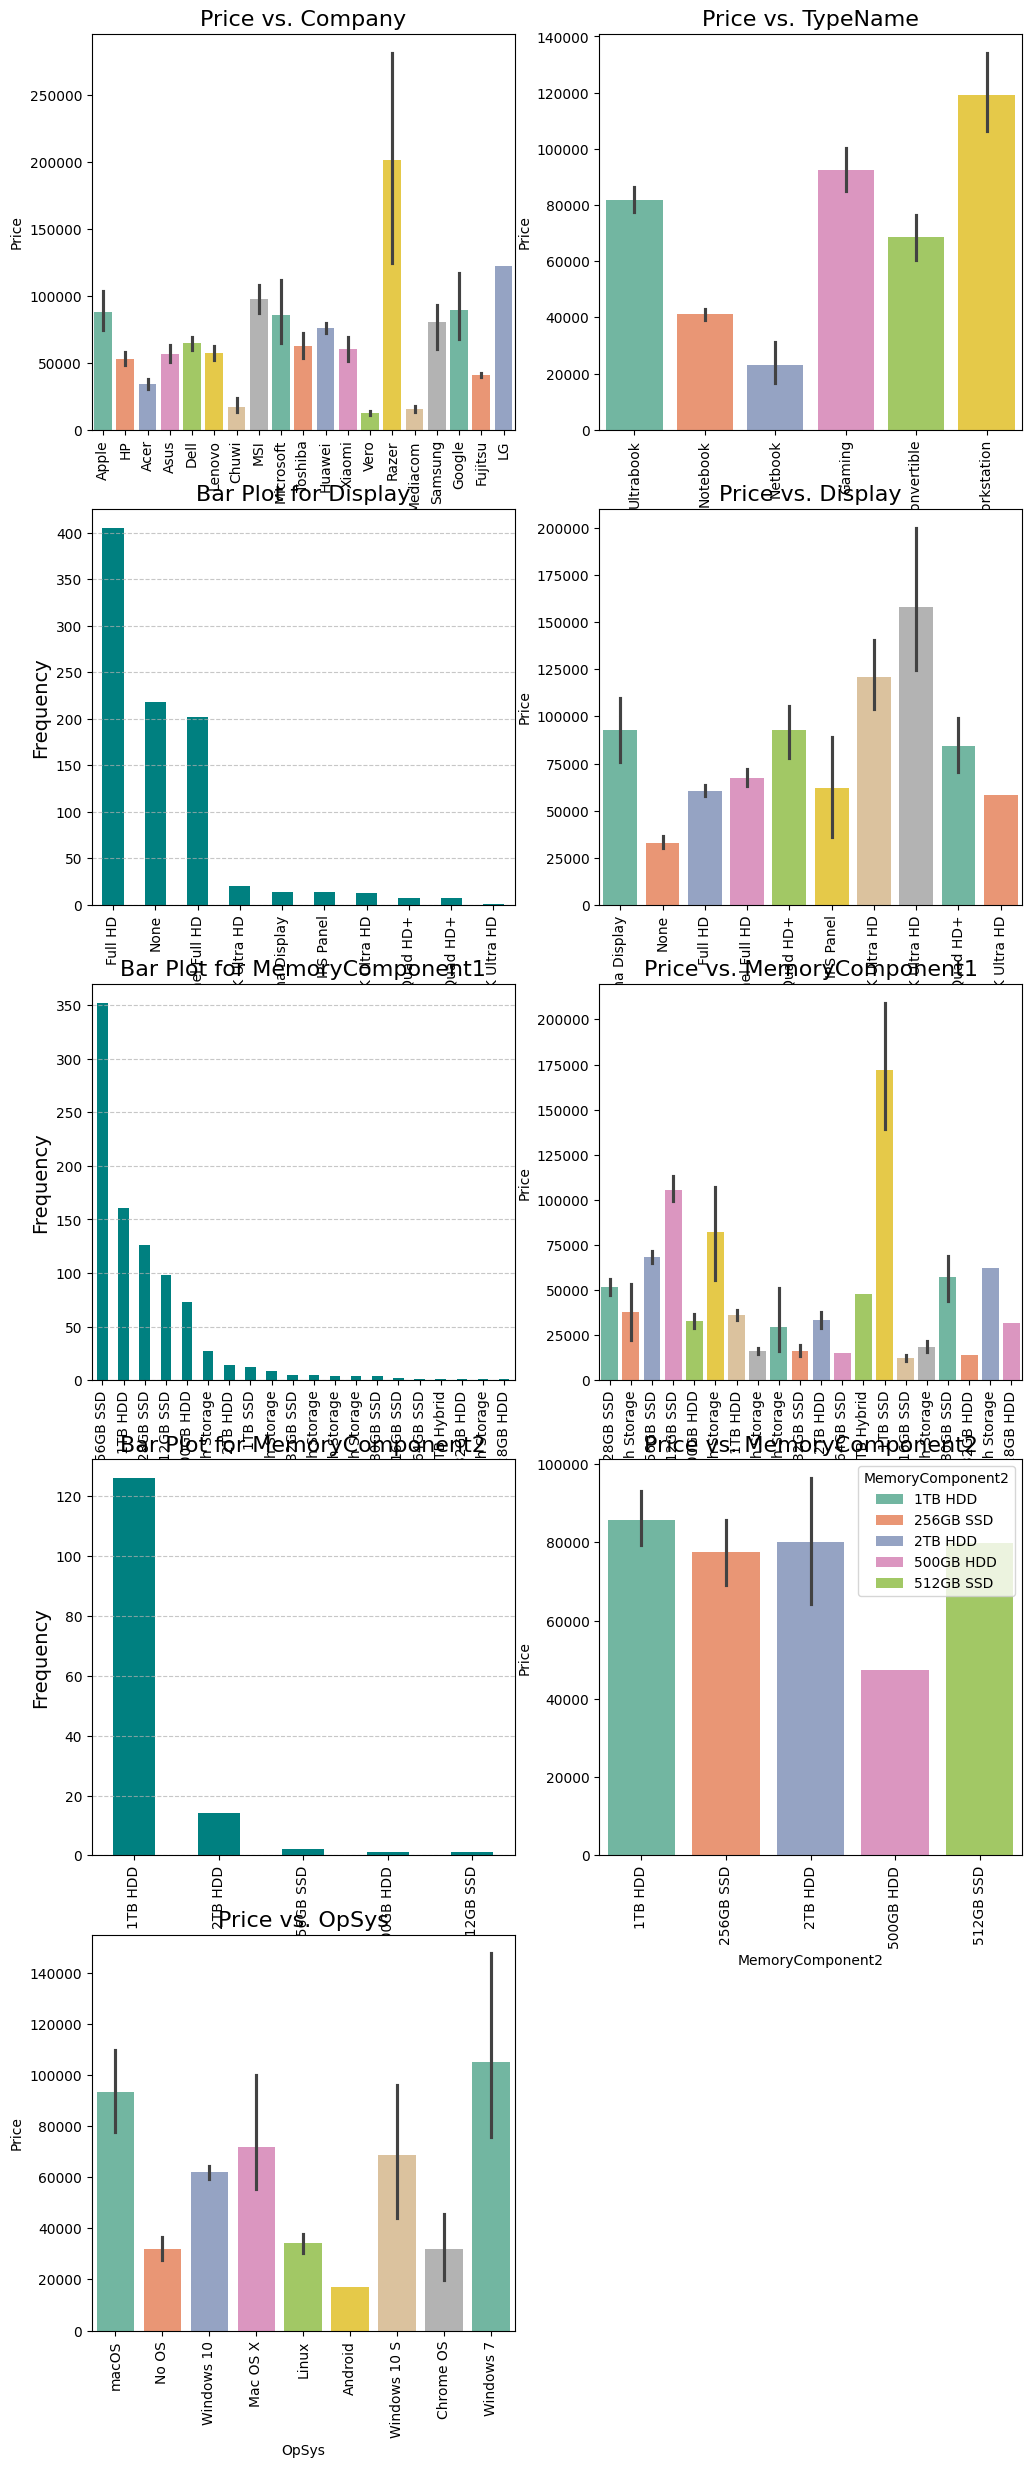

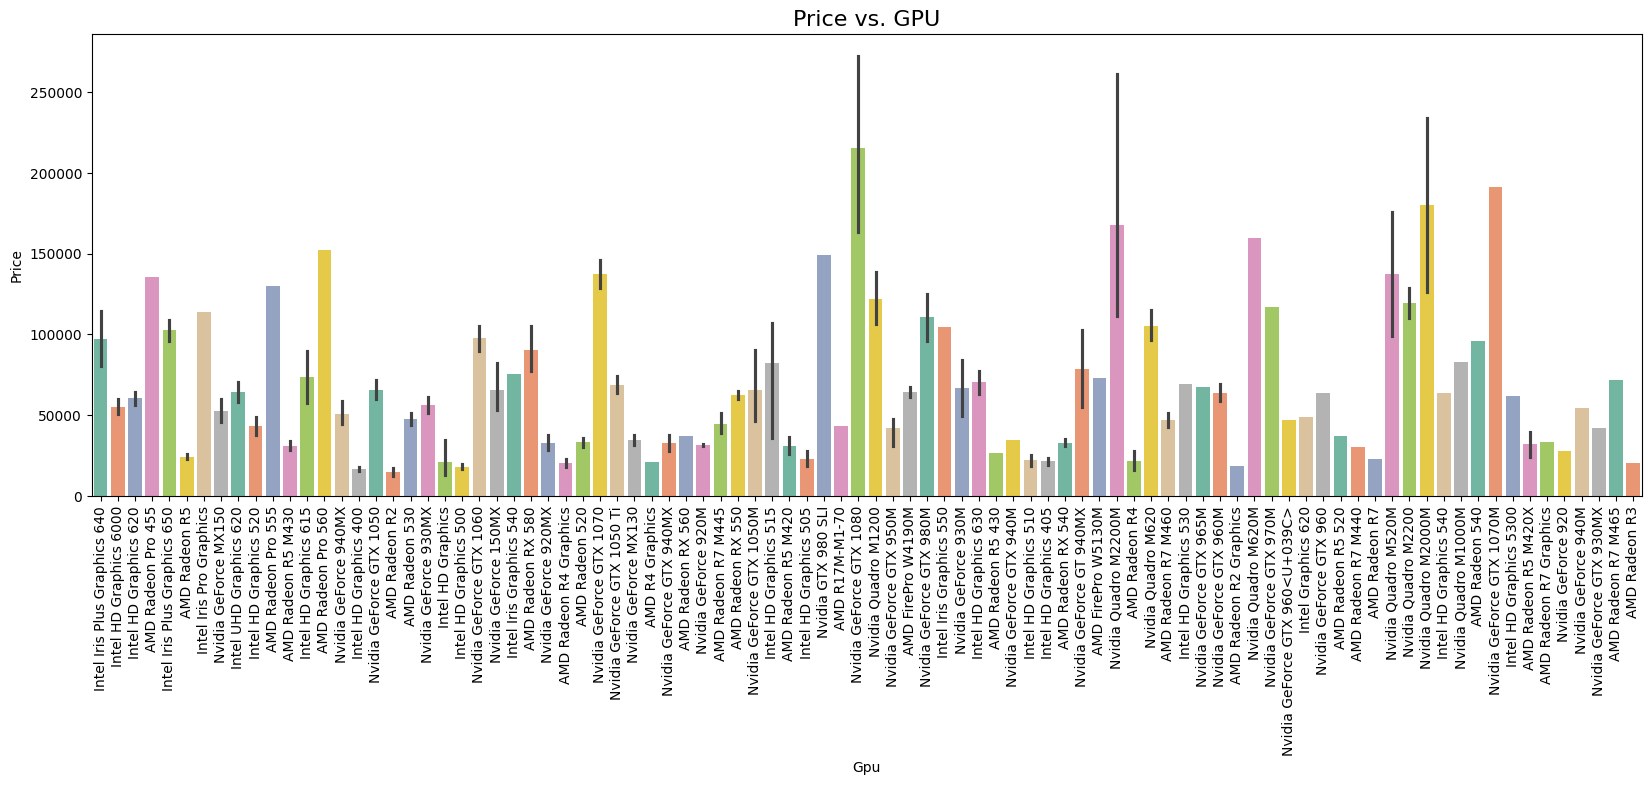

In [ ]:
categorical_features = ['Company', 'TypeName', 'Display', 'MemoryComponent1', 'MemoryComponent2', 'OpSys']

# Plotting bar graphs for each categorical feature
plt.figure(figsize=(12, 6*len(categorical_features)))
plt_ctr = 1

# Plotting Bar and/or Seaborn Bar Plots for each Categorical Feature to visually infer characteristics of the data
for feature in categorical_features:
    if feature not in ['Company', 'TypeName', 'OpSys']:
        plt.subplot(len(categorical_features), 2, plt_ctr)
        eda_train_data[feature].value_counts().plot(kind='bar', color='teal')
        plt.title(f'Bar Plot for {feature}', fontsize=16)
        plt.xlabel(feature, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(rotation='vertical')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt_ctr += 1

    plt.subplot(len(categorical_features), 2, plt_ctr)
    sns.barplot(x = eda_train_data[feature], y = eda_train_data['Price'], hue=eda_train_data[feature], palette='Set2')
    plt.title(f'Price vs. {feature}', fontsize=16)
    plt.xticks(rotation='vertical')
    
    plt_ctr += 1
plt.show()

# Plot for the GPU feature. Values vs. Price Comparison
plt.figure(figsize=(20, 6))
sns.barplot(x = eda_train_data['Gpu'], y = eda_train_data['Price'], hue=eda_train_data['Gpu'], palette='Set2')
plt.title('Price vs. GPU', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

## Data Classes After Feature Pre-Processing

In [ ]:
# Storing all the features in a list of attributes
attributes = eda_train_data.columns.tolist()

print('Unique Values recorded in each feature (after processing)')

# Printing all unique values of each feature in the dataset to understand the data better
for attribute in attributes[:-1]:
    att_table = Table()
    att_table.add_column(f'{attribute}: Unique Count = {len(set(eda_train_data[attribute]))}; Data type = {type(eda_train_data[attribute][0])}', style='blue')

    for element in set(eda_train_data[attribute]):
        att_table.add_row(str(element))

    console.print(att_table)

Unique Values recorded in each feature (after processing)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Company: Unique Count = 19; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ HP                                                    │
│ Chuwi                                                 │
│ Asus                                                  │
│ Lenovo                                                │
│ Samsung                                               │
│ Vero                                                  │
│ Mediacom                                              │
│ Huawei                                                │
│ Apple                                                 │
│ MSI                                                   │
│ LG                                                    │
│ Dell                                                  │
│ Fujitsu                                               │
│ Google                                                │
│ Razer                                                 │
│ Microsoft                                             │
│ Toshiba                                               │
│ Xiaomi                                                │
│ Acer                                                  │
└───────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ TypeName: Unique Count = 6; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Workstation                                           │
│ 2 in 1 Convertible                                    │
│ Ultrabook                                             │
│ Netbook                                               │
│ Notebook                                              │
│ Gaming                                                │
└───────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Inches: Unique Count = 17; Data type = <class 'numpy.float64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 14.1                                                           │
│ 10.1                                                           │
│ 11.6                                                           │
│ 12.0                                                           │
│ 13.3                                                           │
│ 14.0                                                           │
│ 15.4                                                           │
│ 15.6                                                           │
│ 17.3                                                           │
│ 13.5                                                           │
│ 12.5                                                           │
│ 13.0                                                           │
│ 18.4                                                           │
│ 13.9                                                           │
│ 17.0                                                           │
│ 15.0                                                           │
│ 12.3                                                           │
└────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Display: Unique Count = 10; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ IPS Panel Quad HD+                                    │
│ IPS Panel4K Ultra HD                                  │
│ IPS Panel Retina Display                              │
│ 4K Ultra HD                                           │
│ IPS Panel 4K Ultra HD                                 │
│ Full HD                                               │
│ IPS Panel                                             │
│ Quad HD+                                              │
│ IPS Panel Full HD                                     │
│ None                                                  │
└───────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Touchscreen: Unique Count = 2; Data type = <class 'numpy.int64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0                                                                │
│ 1                                                                │
└──────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ScreenArea: Unique Count = 15; Data type = <class 'numpy.int64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 4096000                                                          │
│ 2073600                                                          │
│ 5184000                                                          │
│ 1296000                                                          │
│ 1049088                                                          │
│ 3317760                                                          │
│ 5760000                                                          │
│ 2304000                                                          │
│ 3393024                                                          │
│ 8294400                                                          │
│ 3686400                                                          │
│ 1440000                                                          │
│ 3840000                                                          │
│ 3110400                                                          │
│ 4990464                                                          │
└──────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ CpuModel: Unique Count = 81; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Intel Core i7 6700HQ                                   │
│ AMD E-Series 9000e                                     │
│ Intel Celeron Dual Core 3205U                          │
│ Intel Atom x5-Z8350                                    │
│ AMD E-Series 6110                                      │
│ Intel Core i5 6300U                                    │
│ Intel Core i7 7660U                                    │
│ AMD Ryzen 1700                                         │
│ Intel Celeron Dual Core N3050                          │
│ Intel Atom x5-Z8550                                    │
│ AMD A10-Series 9600P                                   │
│ Intel Core i5 6440HQ                                   │
│ Intel Core i5 7200U                                    │
│ AMD A10-Series 9620P                                   │
│ Intel Core i7 6920HQ                                   │
│ AMD E-Series 7110                                      │
│ Intel Core i7 7560U                                    │
│ Intel Core i7 8650U                                    │
│ Intel Core M                                           │
│ AMD Ryzen 1600                                         │
│ Intel Core i7 7700HQ                                   │
│ AMD E-Series E2-9000                                   │
│ Intel Xeon E3-1505M V6                                 │
│ Intel Core i5 7Y57                                     │
│ Intel Core i5 6300HQ                                   │
│ Intel Pentium Quad Core N3710                          │
│ Intel Core i5 7440HQ                                   │
│ AMD A9-Series A9-9420                                  │
│ Intel Core i7 7Y75                                     │
│ AMD E-Series E2-9000e                                  │
│ AMD A10-Series A10-9620P                               │
│ Intel Pentium Quad Core N4200                          │
│ Intel Core i3 7130U                                    │
│ AMD A6-Series 9220                                     │
│ AMD A8-Series 7410                                     │
│ Intel Xeon E3-1535M v6                                 │
│ Intel Pentium Dual Core 4405U                          │
│ Intel Core i7 8550U                                    │
│ Intel Core i5 7Y54                                     │
│ Intel Core M m3-7Y30                                   │
│ Intel Celeron Quad Core N3160                          │
│ Intel Celeron Dual Core N3350                          │
│ Intel Pentium Dual Core N4200                          │
│ AMD E-Series E2-6110                                   │
│ Intel Celeron Dual Core 3855U                          │
│ AMD A12-Series 9720P                                   │
│ Intel Celeron Quad Core N3450                          │
│ Intel Core i7 7600U                                    │
│ Intel Core i5                                          │
│ Intel Atom Z8350                                       │
│ Intel Core i5 7300U                                    │
│ Intel Core i3 6006U                                    │
│ AMD FX 9830P                                           │
│ Intel Core i7 7820HQ                                   │
│ Intel Core i5 6200U                                    │
│ Intel Core i5 6260U                                    │
│ Intel Core M m3                                        │
│ Intel Core M 7Y30                                      │
│ Intel Core i7 6500U                                    │
│ AMD A12-Series 9700P                                   │
│ AMD A6-Series A6-9220                                  │
│ Intel Atom x5-Z8300                                    │
│ Intel Celeron Quad Core N3710                          │
│ Intel Core i7 7500U                                    │
│ Intel Core i3 6100U                          

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ClockSpeed: Unique Count = 25; Data type = <class 'numpy.float64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0.9                                                                │
│ 1.8                                                                │
│ 2.3                                                                │
│ 3.1                                                                │
│ 2.5                                                                │
│ 2.7                                                                │
│ 3.0                                                                │
│ 2.2                                                                │
│ 1.6                                                                │
│ 2.0                                                                │
│ 2.8                                                                │
│ 2.9                                                                │
│ 1.5                                                                │
│ 1.0                                                                │
│ 1.92                                                               │
│ 1.44                                                               │
│ 1.1                                                                │
│ 2.6                                                                │
│ 2.1                                                                │
│ 3.6                                                                │
│ 1.2                                                                │
│ 3.2                                                                │
│ 1.3                                                                │
│ 1.9                                                                │
│ 2.4                                                                │
└────────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Ram: Unique Count = 8; Data type = <class 'numpy.int64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 32                                                       │
│ 2                                                        │
│ 4                                                        │
│ 6                                                        │
│ 8                                                        │
│ 12                                                       │
│ 16                                                       │
│ 24                                                       │
└──────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ MemoryComponent1: Unique Count = 20; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 512GB SSD                                                      │
│ 256GB SSD                                                      │
│ 128GB HDD                                                      │
│ 256GB Flash Storage                                            │
│ 32GB Flash Storage                                             │
│ 64GB SSD                                                       │
│ 16GB SSD                                                       │
│ 1TB SSD                                                        │
│ 1TB HDD                                                        │
│ 16GB Flash Storage                                             │
│ 512GB Flash Storage                                            │
│ 180GB SSD                                                      │
│ 32GB HDD                                                       │
│ 64GB Flash Storage                                             │
│ 128GB Flash Storage                                            │
│ 128GB SSD                                                      │
│ 32GB SSD                                                       │
│ 500GB HDD                                                      │
│ 1.0TB Hybrid                                                   │
│ 2TB HDD                                                        │
└────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ MemoryComponent2: Unique Count = 6; Data type = <class 'NoneType'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 512GB SSD                                                          │
│ None                                                               │
│ 256GB SSD                                                          │
│ 500GB HDD                                                          │
│ 1TB HDD                                                            │
│ 2TB HDD                                                            │
└────────────────────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Gpu: Unique Count = 90; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ AMD Radeon R5 520                                 │
│ Nvidia GeForce GTX 1070M                          │
│ AMD Radeon RX 560                                 │
│ Intel HD Graphics 405                             │
│ Nvidia GeForce GTX 960                            │
│ AMD Radeon R5 430                                 │
│ Intel HD Graphics 515                             │
│ Nvidia GeForce GTX 950M                           │
│ AMD Radeon R5                                     │
│ Intel HD Graphics 6000                            │
│ Intel Iris Pro Graphics                           │
│ Nvidia GeForce GTX 1080                           │
│ AMD Radeon R7 M445                                │
│ Nvidia GeForce MX130                              │
│ Nvidia GeForce 920MX                              │
│ AMD FirePro W5130M                                │
│ AMD Radeon R2 Graphics                            │
│ Intel UHD Graphics 620                            │
│ Intel Iris Graphics 540                           │
│ AMD Radeon R7                                     │
│ AMD Radeon Pro 555                                │
│ Nvidia Quadro M620                                │
│ Intel HD Graphics 520                             │
│ Nvidia GTX 980 SLI                                │
│ Nvidia GeForce 150MX                              │
│ Intel HD Graphics 540                             │
│ Intel HD Graphics 5300                            │
│ Nvidia GeForce MX150                              │
│ AMD Radeon 530                                    │
│ Nvidia GeForce 930MX                              │
│ AMD Radeon Pro 455                                │
│ AMD Radeon RX 550                                 │
│ AMD Radeon R5 M420X                               │
│ Nvidia Quadro M1000M                              │
│ Nvidia GeForce GTX 930MX                          │
│ AMD Radeon R2                                     │
│ AMD Radeon R5 M430                                │
│ Nvidia GeForce 920                                │
│ Intel HD Graphics 615                             │
│ Nvidia Quadro M1200                               │
│ AMD Radeon R7 Graphics                            │
│ AMD FirePro W4190M                                │
│ AMD Radeon Pro 560                                │
│ AMD Radeon RX 580                                 │
│ Nvidia GeForce 920M                               │
│ Nvidia GeForce GTX 965M                           │
│ Nvidia GeForce GTX 1050 Ti                        │
│ AMD Radeon RX 540                                 │
│ Nvidia GeForce GTX 1050M                          │
│ AMD Radeon R7 M465                                │
│ Intel HD Graphics 510                             │
│ Nvidia GeForce 940M                               │
│ Nvidia Quadro M2200M                              │
│ AMD Radeon R4                                     │
│ AMD Radeon R5 M420                                │
│ Nvidia GeForce GTX 940MX                          │
│ Intel Graphics 620                                │
│ Intel Iris Graphics 550                           │
│ Nvidia GeForce GTX 940M                           │
│ AMD Radeon R7 M440                                │
│ Nvidia GeForce GTX 980M                           │
│ AMD Radeon 520                                    │
│ Nvidia GeForce GTX 1060                           │
│ Intel Iris Plus Graphics 640                      │
│ Nvidia GeForce 940MX                              │
│ Nvidia GeForce GTX 960<U+039C>                    │
│ Nvidia GeForce GTX 1050                           │
│ Nvidia GeForce GTX 960M                           │
│ Nvidia Quadro M2000M                              │
│ AMD R4 Graphics                                   │
│ Intel HD Graphics 530                             │
│ Nv

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ OpSys: Unique Count = 9; Data type = <class 'str'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Windows 10                                         │
│ No OS                                              │
│ Windows 10 S                                       │
│ Chrome OS                                          │
│ Linux                                              │
│ Android                                            │
│ Windows 7                                          │
│ macOS                                              │
│ Mac OS X                                           │
└────────────────────────────────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Weight: Unique Count = 157; Data type = <class 'numpy.float64'> ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0.69                                                            │
│ 1.86                                                            │
│ 1.37                                                            │
│ 2.1                                                             │
│ 1.83                                                            │
│ 1.34                                                            │
│ 2.04                                                            │
│ 1.3                                                             │
│ 1.6                                                             │
│ 2.2                                                             │
│ 1.22                                                            │
│ 2.5                                                             │
│ 2.0                                                             │
│ 1.25                                                            │
│ 1.5                                                             │
│ 1.75                                                            │
│ 3.0                                                             │
│ 2.25                                                            │
│ 3.25                                                            │
│ 4.5                                                             │
│ 1.68                                                            │
│ 1.43                                                            │
│ 1.93                                                            │
│ 1.18                                                            │
│ 2.43                                                            │
│ 2.36                                                            │
│ 2.18                                                            │
│ 1.36                                                            │
│ 1.29                                                            │
│ 1.79                                                            │
│ 1.54                                                            │
│ 2.54                                                            │
│ 2.79                                                            │
│ 2.29                                                            │
│ 0.97                                                            │
│ 4.36                                                            │
│ 1.47                                                            │
│ 1.65                                                            │
│ 1.4                                                             │
│ 1.9                                                             │
│ 1.15                                                            │
│ 2.65                                                            │
│ 2.4                                                             │
│ 2.9                                                             │
│ 2.15                                                            │
│ 2.72                                                            │
│ 3.4                                                             │
│ 1.58                                                            │
│ 2.08                                                            │
│ 2.33                                                            │
│ 2.26                                                            │
│ 2.83                                                            │
│ 4.4                                                             │
│ 1.26                                                            │
│ 4.33                                                            │
│ 1.76                                                  

In [ ]:
def compare_features(data_set, eda_data):

    # Storing all the features in a list of attributes
    attributes2 = data_set.columns.tolist()

    print('Comparison of Before and After Pre-Processing')

    att_table = Table()
    att_table.add_column(f'Features Before: (Total = {len(attributes2)})')
    att_table.add_column(f'Features After: (Total = {len(attributes)})')

    # Find the minimum length between attributes and attributes2
    min_length = min(len(attributes), len(attributes2))


    # Add rows for attributes that are present in both lists
    for i in range(min_length):
        att_table.add_row(
            f'{attributes2[i]}: Unique Count = {len(set(data_set[attributes2[i]]))}',
            f'{attributes[i]}: Unique Count = {len(set(eda_data[attributes[i]]))}'
        )

    # Add remaining attributes if it's longer
    if len(attributes) > min_length:
        for i in range(min_length, len(attributes)):
            att_table.add_row(
                '', f'{attributes[i]}: {len(set(eda_data[attributes[i]]))}'
            )

        # att_table.add_row(f'{attribute2}: Unique Count = {len(set(data_set[attribute2]))}', 
        # f'{attribute}: Unique Count = {len(set(eda_data[attribute]))}')

    console.print(att_table)

compare_features(train_data, eda_train_data)
# compare_features(test_data, eda_test_data)

Comparison of Before and After Pre-Processing

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Features Before: (Total = 11)       ┃ Features After: (Total = 15)        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Company: Unique Count = 19          │ Company: Unique Count = 19          │
│ TypeName: Unique Count = 6          │ TypeName: Unique Count = 6          │
│ Inches: Unique Count = 17           │ Inches: Unique Count = 17           │
│ ScreenResolution: Unique Count = 37 │ Display: Unique Count = 10          │
│ Cpu: Unique Count = 100             │ Touchscreen: Unique Count = 2       │
│ Ram: Unique Count = 8               │ ScreenArea: Unique Count = 15       │
│ Memory: Unique Count = 33           │ CpuModel: Unique Count = 81         │
│ Gpu: Unique Count = 90              │ ClockSpeed: Unique Count = 25       │
│ OpSys: Unique Count = 9             │ Ram: Unique Count = 8               │
│ Weight: Unique Count = 161          │ MemoryComponent1: Unique Count = 20 │
│ Price: Unique Count = 600           │ MemoryComponent2: Unique Count = 6  │
│                                     │ Gpu: 90                             │
│                                     │ OpSys: 9                            │
│                                     │ Weight: 157                         │
│                                     │ Price: 600                          │
└─────────────────────────────────────┴─────────────────────────────────────┘

## Final Table Visualization After Feature Pre-Processing
After this, use the EDA information to label encode and one-hot-encode otherwise

In [ ]:
# Display the Dataframe after initial data processing

styled_df = eda_train_data.style

# Apply various formatting options
styled_df = styled_df.set_properties(**{'text-align': 'center'})  # Align text to center
styled_df = styled_df.set_table_styles([{'selector': 'th', 'props': [('font-size', '11pt')]}])  # Set font size for headers

# Display the styled DataFrame

styled_df

## Export EDA Dataset
Export EDA dataset to csv after visualizations and feature splitting complete

In [ ]:
eda_train_set = 'data/eda_train_data.csv'
eda_train_data.to_csv(eda_train_set, index_label='Number')

eda_test_set = 'data/eda_test_data.csv'
eda_test_data.to_csv(eda_test_set, index_label='Number')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9992d859-d1f8-4007-afdd-e66541c42881' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>